참고: https://www.dacon.io/codeshare/4557?dtype=recent

# 1. git clone으로 폴더 다운로드
- git clone은 클라이언트 상에 아무것도 없을 때 서버의 프로젝트를 내려받는 명령어이다. 
- 깃허브의 Pytorch-YOLOv3를 다운받겠다는 의미이다.

In [1]:
!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3

Cloning into 'PyTorch-YOLOv3'...
remote: Enumerating objects: 1970, done.
remote: Total 1970 (delta 0), reused 0 (delta 0), pack-reused 1970
Receiving objects: 100% (1970/1970), 16.67 MiB | 45.51 MiB/s, done.
Resolving deltas: 100% (1179/1179), done.


# 2. 폴더 이동 후 필요한 package를 설치하기

In [2]:
cd PyTorch-YOLOv3/

/content/PyTorch-YOLOv3


In [ ]:
!pip freeze > requirements.txt

- Python의 패키지(라이브러리)를 pip으로 관리하고 있는 경우, 설정 파일인 requirements.txt를 사용해서 파일 안에 지정된 패키지를 지정한 버전으로 한꺼번에 설치할 수 있다.

# 3. 이미 학습이 된 weight를 다운로드
- sh파일 안에 이미 학습을 시킨 weight를 다운 받는 명령어가 있으니 다운을 받는다.
- sh파일 안은 cat 명령어를 이용하여 내용을 확인할 수 있다. cat 명령어는 파일 또는 표준 입력의 내용을 그대로 표준 출력에 출력하는 명령어이다.

- 3가지의 weight를 다운받을 것이다.
- vanilla YOLOv3와 tiny YOLOv3, backbone network인 darknet53 weights
- 이미 학습된 weight를 이용하여 이미지의 Detection을 시도해본다.


In [ ]:
cd weights/

/content/PyTorch-YOLOv3/weights


In [ ]:
# 스크립트 내용 확인 가능
!cat /content/PyTorch-YOLOv3/weights/download_weights.sh

#!/bin/bash
# Download weights for vanilla YOLOv3
wget -c "https://pjreddie.com/media/files/yolov3.weights" --header "Referer: pjreddie.com"
# # Download weights for tiny YOLOv3
wget -c "https://pjreddie.com/media/files/yolov3-tiny.weights" --header "Referer: pjreddie.com"
# Download weights for backbone network
wget -c "https://pjreddie.com/media/files/darknet53.conv.74" --header "Referer: pjreddie.com"


In [ ]:
# 다운받기
!bash download_weights.sh

--2023-03-26 07:15:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  44.5MB/s    in 5.6s    

2023-03-26 07:15:17 (42.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2023-03-26 07:15:17--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  31.3MB/s    in 1.1s    

2023-03-26 07:15:18 (31.3 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]

--202

# 4. 예측하기
- 상위 폴더로 이동후 detect.py 파일을 실행한다.
- 이때 --image_folder 옵션에 이미지들이 들어있는 폴더를 지정해주면 된다.
- 이때 PyToch YOLO를 설치해 주어야 한다.
- PyToch YOLO: A minimal PyTorch implementation of YOLOv3, with support for training, inference and evaluation.

In [ ]:
cd /content/PyTorch-YOLOv3/pytorchyolo/

/content/PyTorch-YOLOv3/pytorchyolo


In [ ]:
!pip3 install pytorchyolo --user

In [ ]:
cd /content/PyTorch-YOLOv3/

/content/PyTorch-YOLOv3


In [ ]:
!python3 ./pytorchyolo/detect.py 

Environment information:
System: Linux 5.10.147+
Not using the poetry package
Current Commit Hash: 3467db2
Command line arguments: Namespace(model='config/yolov3.cfg', weights='weights/yolov3.weights', images='data/samples', classes='data/coco.names', output='output', batch_size=1, img_size=416, n_cpu=8, conf_thres=0.5, nms_thres=0.4)
/root/.local/lib/python3.9/site-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Detecting: 100% 10/10 [00:01<00:00,  6.24it/s]
Image data/samples/dog.jpg:
	+ Label: bicycle | Confidence: 0.9929
	+ Label: dog | Confidence: 0.9924
	+ Label: truck | Confidence: 0.9401
I

- 기본 제공하는 sample 폴더 내용을 확인해보면 다음과 같은 예시 jpg가 있다.

In [ ]:
ls -al /content/PyTorch-YOLOv3/data/samples/

total 1320
drwxr-xr-x 2 root root   4096 Mar 26 07:09 ./
drwxr-xr-x 4 root root   4096 Mar 26 07:09 ../
-rw-r--r-- 1 root root 163759 Mar 26 07:09 dog.jpg
-rw-r--r-- 1 root root 141886 Mar 26 07:09 eagle.jpg
-rw-r--r-- 1 root root 113880 Mar 26 07:09 field.jpg
-rw-r--r-- 1 root root 382965 Mar 26 07:09 giraffe.jpg
-rw-r--r-- 1 root root 133495 Mar 26 07:09 herd_of_horses.jpg
-rw-r--r-- 1 root root 126867 Mar 26 07:09 messi.jpg
-rw-r--r-- 1 root root  78771 Mar 26 07:09 person.jpg
-rw-r--r-- 1 root root  84988 Mar 26 07:09 room.jpg
-rw-r--r-- 1 root root 102770 Mar 26 07:09 street.jpg


- dog.jpg 파일을 가져와 실행해보자

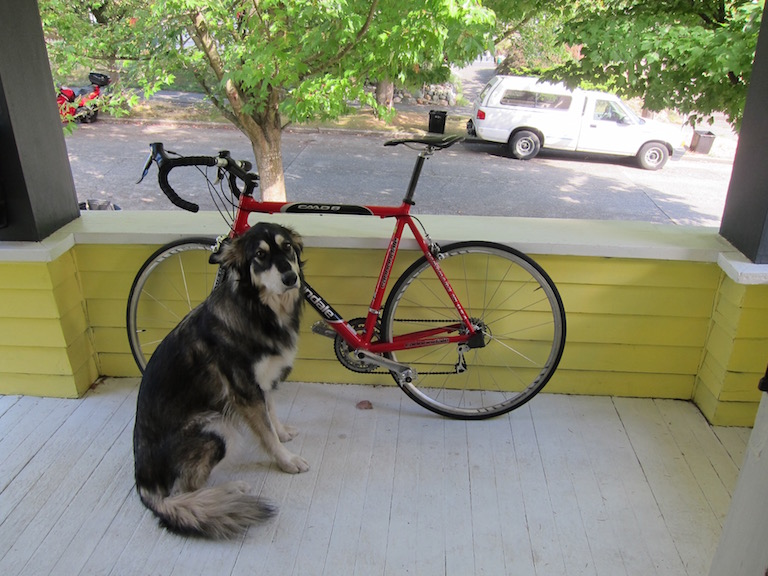

In [ ]:
from IPython.display import Image
Image('/content/PyTorch-YOLOv3/data/samples/dog.jpg')

In [ ]:
ls -al /content/PyTorch-YOLOv3/output/

total 2564
drwxr-xr-x  2 root root   4096 Mar 26 07:24 ./
drwxr-xr-x 10 root root   4096 Mar 26 07:24 ../
-rw-r--r--  1 root root 325449 Mar 26 07:24 dog.png
-rw-r--r--  1 root root 302903 Mar 26 07:24 eagle.png
-rw-r--r--  1 root root 299289 Mar 26 07:24 field.png
-rw-r--r--  1 root root 379866 Mar 26 07:24 giraffe.png
-rw-r--r--  1 root root 266355 Mar 26 07:24 herd_of_horses.png
-rw-r--r--  1 root root 244507 Mar 26 07:24 messi.png
-rw-r--r--  1 root root 179087 Mar 26 07:24 person.png
-rw-r--r--  1 root root 308537 Mar 26 07:24 room.png
-rw-r--r--  1 root root 293255 Mar 26 07:24 street.png


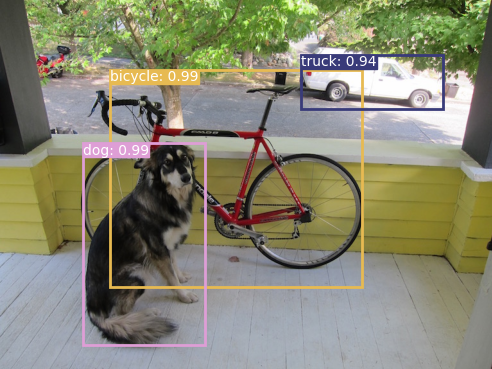

In [ ]:
Image('/content/PyTorch-YOLOv3/output/dog.png')

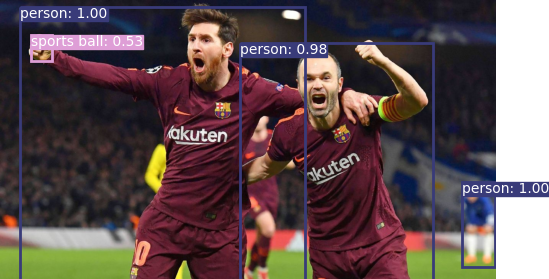

In [ ]:
Image('/content/PyTorch-YOLOv3/output/messi.png')

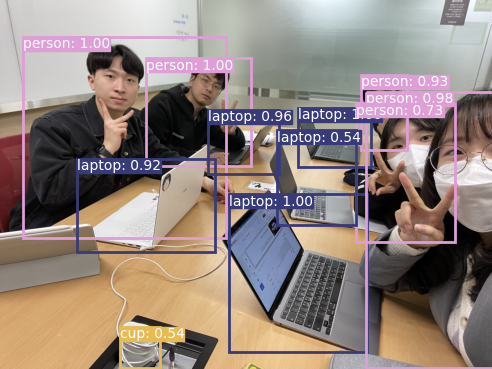

In [ ]:
Image('/content/PyTorch-YOLOv3/output/sample.png')